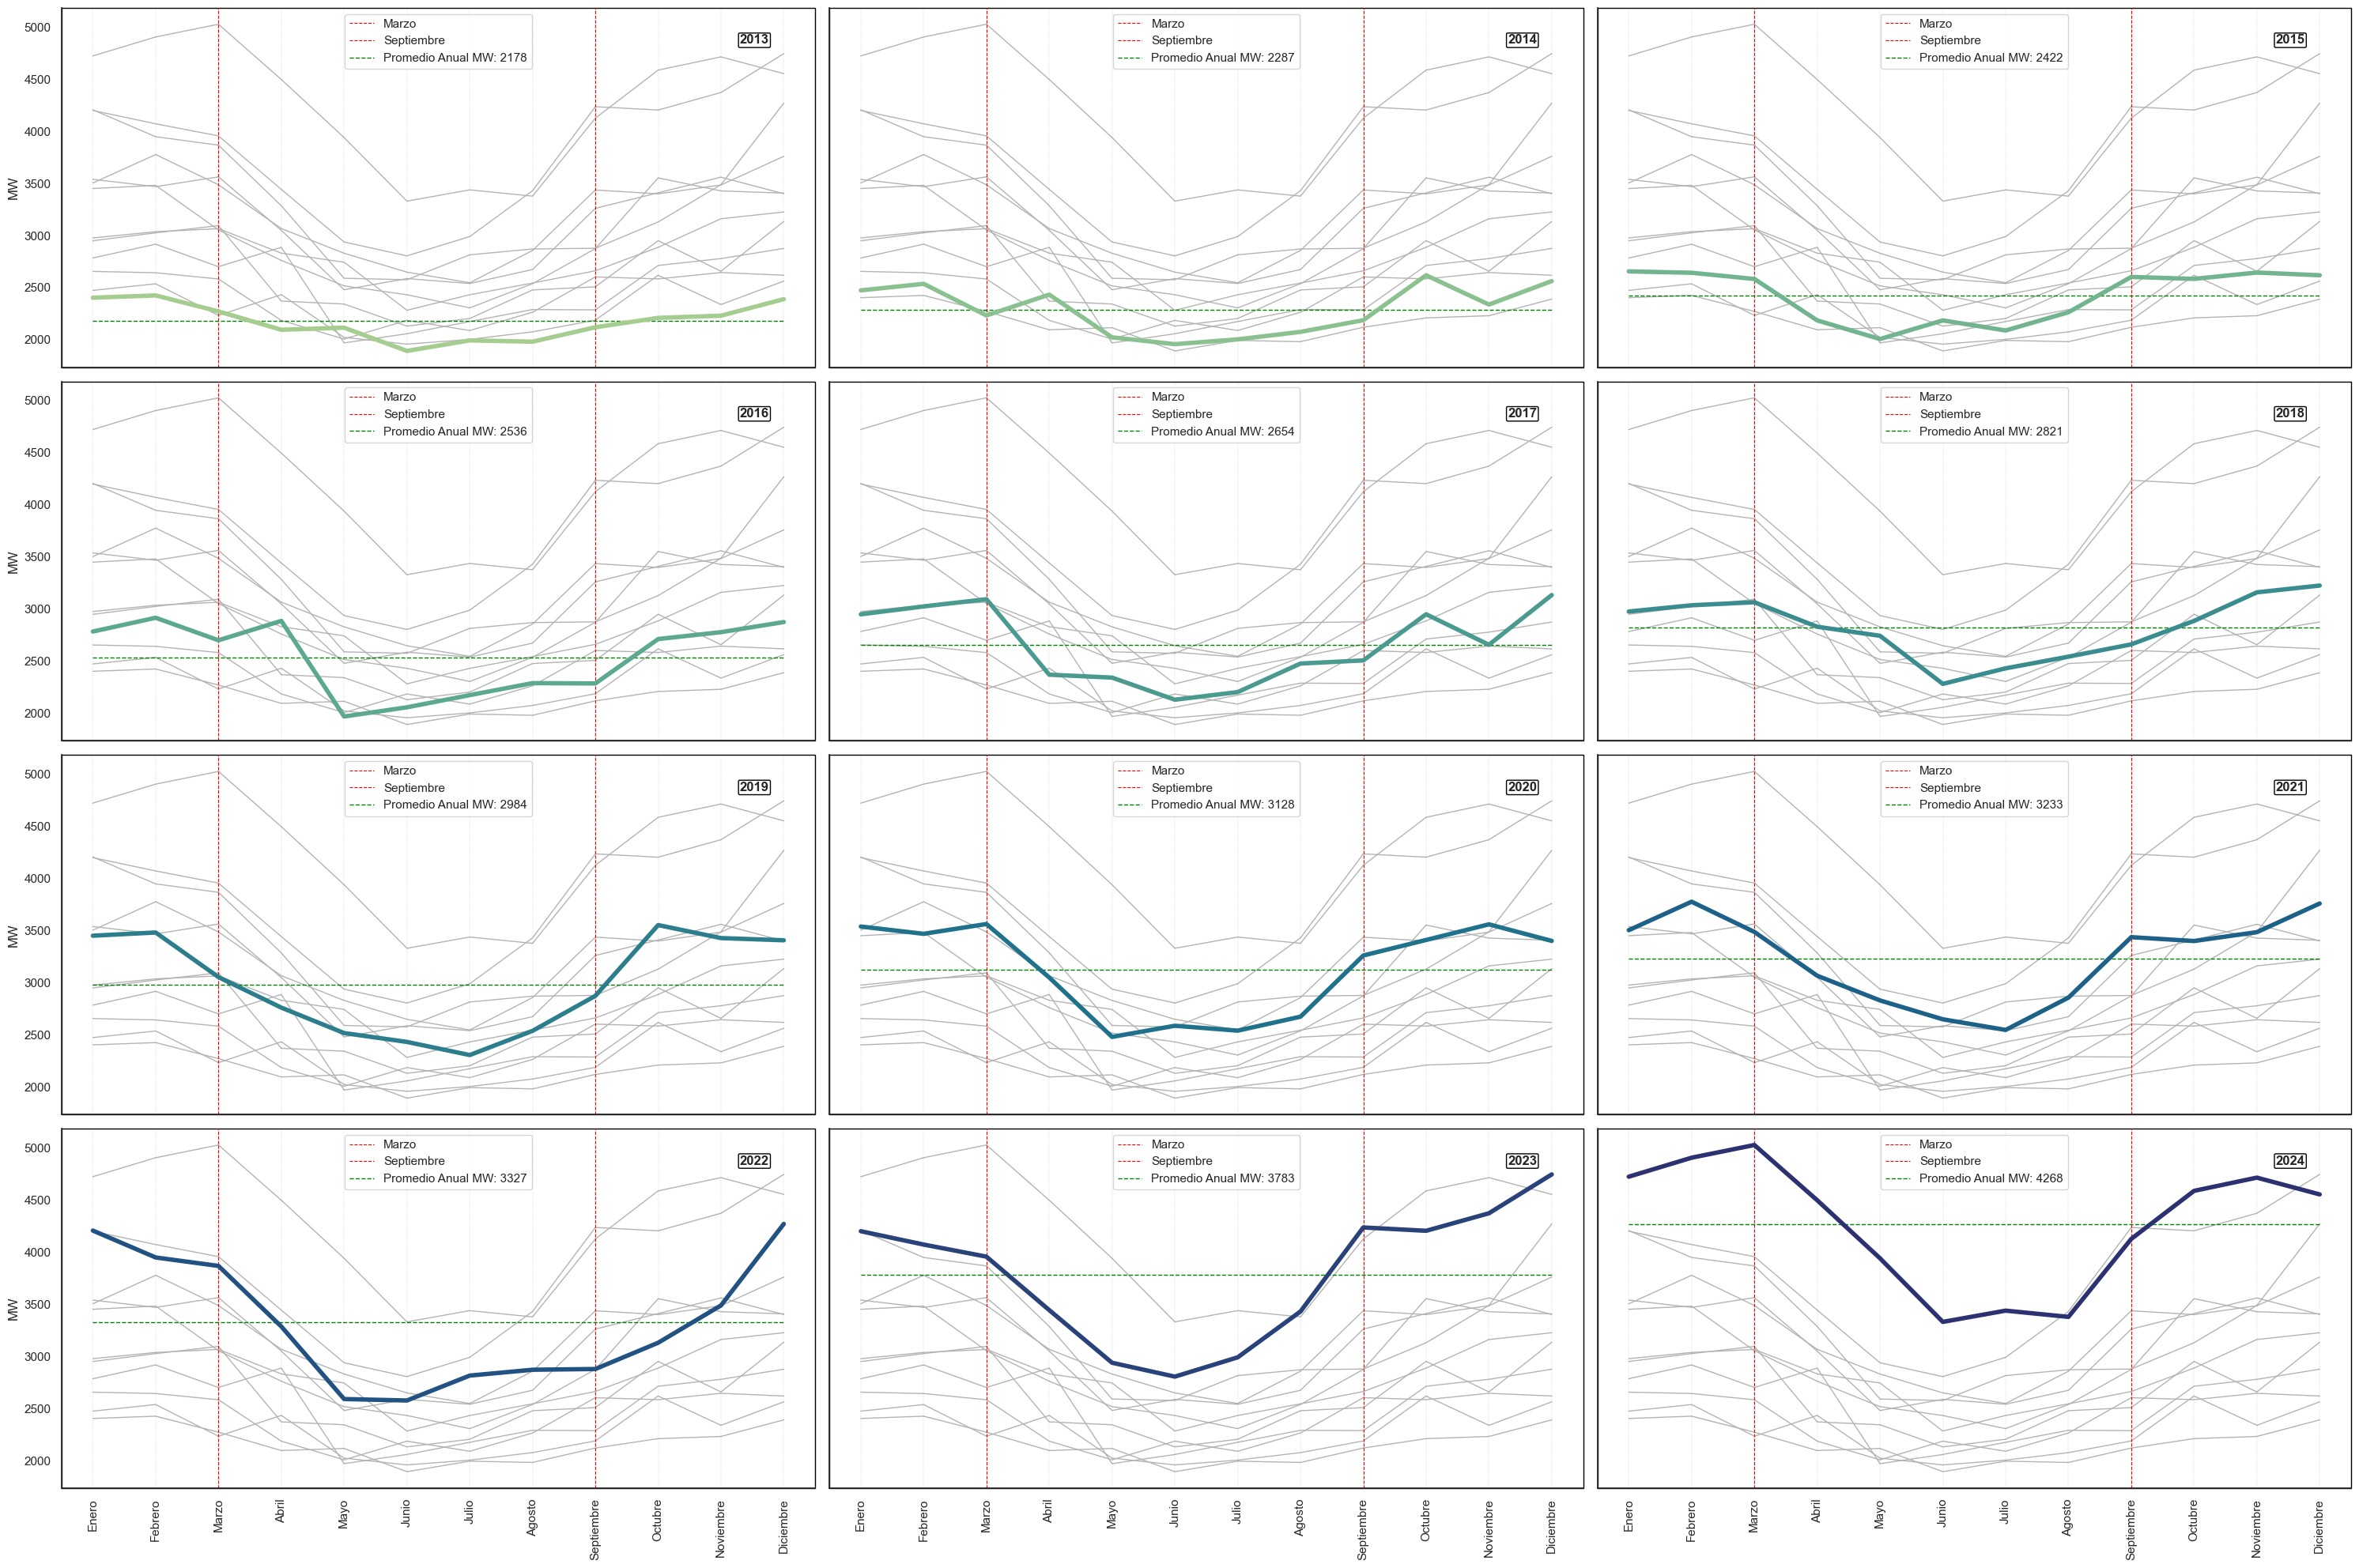

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo Excel
df = pd.read_excel('demanda2.xlsx')

# Seleccionar las columnas relevantes (Año y meses)
columnas_meses = ['Año', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_meses = df[columnas_meses]

# Reorganizar el DataFrame para ser compatible con Seaborn
df_meses_melted = pd.melt(df_meses, id_vars='Año', var_name='Mes', value_name='KWh')

# Ordenar los meses correctamente
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_meses_melted['Mes'] = pd.Categorical(df_meses_melted['Mes'], categories=orden_meses, ordered=True)

# Configurar tema y estilo de Seaborn
sns.set_theme(style="white")

# Plot cada serie temporal de años en su propia faceta
g = sns.relplot(
    data=df_meses_melted,
    x="Mes", y="KWh", col="Año", hue="Año",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=5, aspect=2, legend=False
)

# Iterar sobre cada subplot para personalizarlo
for año, ax in g.axes_dict.items():
    # Añadir el título dentro de un recuadro en el gráfico
    ax.text(.9, .90, str(año), transform=ax.transAxes, fontweight="bold", 
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1'))
    
    # Dibujar las líneas de fondo de todas las series temporales
    sns.lineplot(
        data=df_meses_melted, x="Mes", y="KWh", units="Año",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )
    
    # Rotar las etiquetas de los meses
    ax.tick_params(axis='x', rotation=90)
    
    # Establecer los ticks manualmente para evitar advertencias
    ax.set_xticks(range(len(orden_meses)))
    ax.set_xticklabels(orden_meses)

    # Agregar líneas verticales en marzo y septiembre
    ax.axvline(x=2, color='red', linestyle='--', linewidth=0.8, label='Marzo')
    ax.axvline(x=8, color='red', linestyle='--', linewidth=0.8, label='Septiembre')

    # Calcular y agregar línea de promedio anual, limitada al rango de datos
    datos_año = df_meses_melted[df_meses_melted['Año'] == año]
    promedio_anual = datos_año['KWh'].mean()
    ax.plot(datos_año['Mes'], [promedio_anual] * len(datos_año), color='green', linestyle='--', linewidth=1, 
            label=f'Promedio Anual MW: {promedio_anual:.0f}')
    
    # Agregar pequeñas marcas en los meses
    for idx in range(len(orden_meses)):
        ax.axvline(x=idx, color='black', linestyle='--', alpha=0.3, linewidth=0.2)

    ax.legend()

    # Agregar borde negro alrededor de cada gráfico y ajustar los límites del eje X
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1)
    ax.set_xlim(- 0.5, len(orden_meses) - 0.5)  # Ajusta los límites para que cubran solo los meses


# Ajustar etiquetas y disposición
g.set_titles("")
g.set_axis_labels("", "MW")
g.tight_layout()

# Mostrar el gráfico
plt.show()

# Guardar el gráfico con resolución de 200 dpi
g.savefig("grafico_demandaactual.png", dpi=200, bbox_inches="tight")